# Exploratory Data Analysis
    - [x] Remove inconsistent data (samples with multiple labels)
    - [x] Plot distribution of (consistent) labels

In [16]:
import pandas as pd
from collections import defaultdict

In [21]:
data = pd.read_csv("/home/jorge/samples-sars-cov2/srrgis.clade.csv")
data.replace(to_replace="None",value=None, inplace=True)
init_data=data.shape[0]
data.dropna(subset=["Clade","PANGO_LINEAGE"], inplace=True)
print(f"Removed None data: {init_data - data.shape[0]}")

Removed None data: 212


### Count unique SRR_ID

In [22]:

unique_srrid = data.drop_duplicates(subset=["SRR_ID"]).shape[0]
unique_srrid_clade = data.drop_duplicates(subset=["SRR_ID","Clade"]).shape[0]
unique_srrid_pango = data.drop_duplicates(subset=["SRR_ID","PANGO_LINEAGE"]).shape[0]

In [23]:
print(f"Unique SRR_ID: {unique_srrid}")
print(f"Unique SRR_ID+CLADE: {unique_srrid_clade}")
print(f"Unique SRR_ID+PANGO: {unique_srrid_pango}")

Unique SRR_ID: 114599
Unique SRR_ID+CLADE: 119934
Unique SRR_ID+PANGO: 121530


In [24]:
# Find all GISAID clades assign to each SRR_ID
gisaid = defaultdict(list)
list_srr = data["SRR_ID"].tolist()
list_clade = data["Clade"].tolist()
for srr, clade in zip(list_srr, list_clade): 
    gisaid[srr].append(clade)

gisaid = {srr: list(set(clade)) for srr,clade in gisaid.items()}

In [25]:
# GISAID inconsistent data
gisaid_dup = dict(filter(lambda d: len(d[1])>1 , gisaid.items()))
print(f"{len(gisaid_dup)} inconsistent SRR, multiple GISAID labels")

1984 inconsistent SRR, multiple GISAID labels


In [26]:
# Find all PANGO lineages assign to each SRR_ID
pango = defaultdict(list)
list_srr = data["SRR_ID"].tolist()
list_lineage = data["Clade"].tolist()
for srr, lineage in zip(list_srr, list_lineage): 
    pango[srr].append(lineage)

pango = {srr: list(set(lineage)) for srr,lineage in pango.items()}

In [27]:
# PANGO inconsistent
pango_dup = dict(filter(lambda d: len(d[1])>1 , pango.items()))
print(f"{len(pango_dup)} inconsistent SRR, multiple PANGO labels")

1984 inconsistent SRR, multiple PANGO labels


In [28]:
set(gisaid_dup.keys()) == set(pango_dup.keys()) 

True

## Clean Data

In [29]:
cols = ['SRR_ID','SEQUENCE_NAME','GISAID_ID','COLLECTION_DATE','PANGO_LINEAGE','Clade']

In [30]:
data.columns

Index(['Unnamed: 0', 'Run', 'SEQUENCE_NAME', 'GISAID_ID', 'SRR_ID',
       'COLLECTION_DATE', 'PANGO_LINEAGE', 'GISAI_ID', 'Clade'],
      dtype='object')

In [34]:
idx_inconsistent = data.query(f"SRR_ID in {tuple(gisaid_dup.keys())}").index
print(f"Inconsistent data: rows to remove {len(idx_inconsistent)}")

Inconsistent data: rows to remove 9526


In [35]:
data.drop(labels=idx_inconsistent, axis='index', inplace=True)

In [45]:

data.to_csv("data/clean_labels.tsv",sep="\t")

### Distribution of labels
___
#### GISAID Clades

In [38]:
gisaid_dist = data.groupby("Clade").size()
print(f"Number of GISAID clades: {len(gisaid_dist)}")
gisaid_dist

Number of GISAID clades: 9


Clade
G       3340
GH      7908
GR      5593
GRY    78480
GV     16755
L         93
O         92
S        251
V        104
dtype: int64

#### Pango Lineages

In [37]:
pango_dist = data.groupby("PANGO_LINEAGE").size()

In [39]:
print(f"Number of Pango Lineages: {len(pango_dist)}")
pango_dist

Number of Pango Lineages: 568


PANGO_LINEAGE
A         43
A.1      102
A.19       1
A.2        1
A.2.3      8
        ... 
V.1       14
V.2        9
W.3       21
W.4      130
Z.1       67
Length: 568, dtype: int64

In [40]:
pango_dist.describe()

count      568.000000
mean       198.267606
std       3410.767758
min          1.000000
25%          2.000000
50%          5.500000
75%         19.250000
max      80700.000000
dtype: float64

<AxesSubplot:xlabel='PANGO_LINEAGE'>

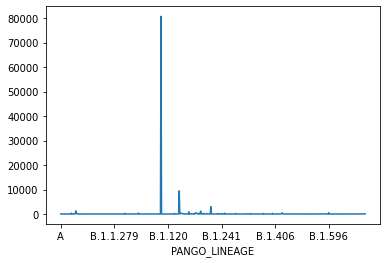

In [36]:
pango_dist.plot()

In [44]:
pango_dist[pango_dist > 1000]

PANGO_LINEAGE
B.1           1318
B.1.1.7      80700
B.1.177       9455
B.1.177.7     1195
B.1.2         3004
dtype: int64